Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução à Teoria das Vibrações


### Trabalho 02 - Resposta de uma estrutura com múltiplos graus de liberdade

---
_Caio César Dias Matos, Mestrando em Estruturas - UFRGS_ 

_ID: 00312139_ 

_Porto Alegre, RS, Brasil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as sp

from MRPy import MRPy


## Metodologia <a name="section_1"></a> 

Para o tipo de análise solicitada, realizou-se a construção de um modelo estrutural capaz de fornecer os dados necessários para a montagem do estudo. Dessa forma, com o auxílio do software Ftool, montou-se uma viga treliçada em aço ($E = 205000 MPa$, $ \rho = 7860 kg/m^{3}$) com as dimensões e perfil mostrados nas figuras a seguir. 

<img src="trab2data/trab20.jpg" alt="SDOF system" width="120px"/>

<img src="trab2data/trab21.jpg" alt="SDOF system" width="1020px"/>


A estrutura foi projetada propositalmente com 10 nós internos, excluindo os nós dos apoios, para essa análise. Com isso, em cada nó foi aplicada uma força de $1 kN$ e os deslocamentos gerados por essa ação foram registrados em forma de matriz, a matriz de flexibilidade que será a base do estudo apresentado. 

<img src="trab2data/trab22.jpg" alt="SDOF system" width="1020px"/>

<img src="trab2data/trab23.jpg" alt="SDOF system" width="1020px"/>



## Análise dos dados e Resultados <a name="section_2"></a> 

Primeiro, é definida e inserida a matriz de flexibilidade do problema. A matriz é obtida, como explicado anteriormente, pela captura dos deslocamentos de todos os nós selecionados após a ação de uma força unitária. Tem-se então:


In [2]:
#Matriz H retirada do modelo no Ftool

H = np.array([[1.18E-05,1.63E-05,1.90E-05,2.02E-05,2.00E-05,1.86E-05,1.61E-05,1.28E-05,8.90E-06,4.60E-06],
[1.63E-05,2.99E-05,3.57E-05,3.82E-05,3.81E-05,3.57E-05,3.10E-05,2.47E-05,1.72E-05,8.90E-06],
[1.90E-05,3.57E-05,4.91E-05,5.34E-05,5.39E-05,5.07E-05,4.43E-05,3.54E-05,2.47E-05,1.28E-05],
[2.02E-05,3.82E-05,5.34E-05,6.45E-05,6.60E-05,6.28E-05,5.51E-05,4.43E-05,3.10E-05,1.61E-05],
[2.00E-05,3.81E-05,5.39E-05,6.60E-05,7.39E-05,7.03E-05,6.28E-05,5.07E-05,3.57E-05,1.86E-05],
[1.86E-05,3.57E-05,5.07E-05,6.28E-05,7.03E-05,7.39E-05,6.60E-05,5.39E-05,3.81E-05,2.00E-05],
[1.61E-05,3.10E-05,4.43E-05,5.51E-05,6.28E-05,6.60E-05,6.45E-05,5.34E-05,3.82E-05,2.02E-05],
[1.28E-05,2.47E-05,3.54E-05,4.43E-05,5.07E-05,5.39E-05,5.34E-05,4.91E-05,3.57E-05,1.90E-05],
[8.90E-06,1.72E-05,2.47E-05,3.10E-05,3.57E-05,3.81E-05,3.82E-05,3.57E-05,2.99E-05,1.63E-05],
[4.60E-06,8.90E-06,1.28E-05,1.61E-05,1.86E-05,2.00E-05,2.02E-05,1.90E-05,1.63E-05,1.18E-05]])


Logo após segue-se para a montagem da matriz de massa concentrada. Essa matriz terá por característica a diagonal principal definida e os demais termos nulos. Cada valor da diagonal principal representará a massa de cada nó analisado, dessa forma:

In [3]:
#Montagem da matriz de massa

s=np.shape(H)
M=np.array(np.zeros(s));
m=752; #Massa estimada para o modelo por nó analisado
o=np.int(np.sqrt(np.size(H)))
for i in range(0, o):
    M [i,i] = m


O próximo passo é calcular os autovalores e autovetores da matriz dinâmica, resultante da multiplicação da matriz de flexibilidade pela matriz de massa concentrada. Além disso, calculam-se as frequências referentes a cada modo de vibração encontrado. Logo:

In [4]:
#Cálculo dos autovalores e vetores da matriz dinâmica e vetor de frequência modal
D = np.dot(H,M)
w2,phi=sp.eig(D)

#Ordenar autovalores e vetores
iw   = w2.argsort()
w2  = w2[iw]
phi = phi[:,iw]

fn = [ ]
w=4*np.pi*np.pi
for i in range(0, o):
    fn.append(np.sqrt(1/(w*w2[i])))
    

Com isso, pode-se obter os primeiros 4 modos de vibração da estrutura e plotá-los.

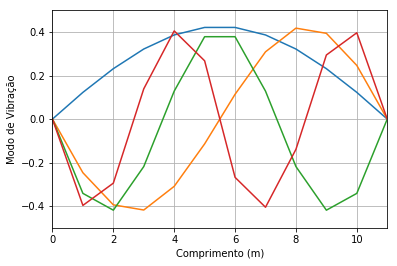

In [5]:
#4 primeiros modos de vibração 

l=11#comprimento da estrutura
L=np.linspace(0,l,l+1)
g=(o,l+1)
modo=np.zeros(g)
modo1=np.matrix.transpose(phi)

for i in range(0, o):
    for j in range(0,o):
        modo[i,j+1]=modo1[i,j]
        

for i in range(0,4): 
    plt.plot(L, modo[l-i-2,:])
    
plt.xlim(0, max(L));        plt.xlabel('Comprimento (m)') 
plt.ylim(-0.5, 0.5);   plt.ylabel('Modo de Vibração') 
plt.grid(True) 




Com esses valores de frequências e os modos de vibração, é possível aplicar uma força aleatória em um dos nós e observar a o comportamento da estrutura a esse impulso. A seguir, é simulado uma excitação de $50000 N$ no modo onde o período ($T$) é o mínimo, ($T_{min}$), ou seja, qunado a frequência natural de vibração for a máxima ($f_{máx}$).

In [9]:
#Impacto de força aleatória e velocidade inicial e Índice do vetor para o Tmin->fmax

td=[ ]
vo=[ ]

for i in range(0, o):
    td.append(1/fn[i])
    Fo = 50000 #newtons

p=0
tmin=min(td)
for i in range(0, o):
    if td[i] == tmin:
            p=i

teta =np.pi/2

for i in range(0, o):
    if i == p:
            vo.append(Fo*td[i]/m)
    else:
            vo.append(0)
  

Calcula-se então os valores de deslocamento máximo para cada modo com base na velocidade inicial ($v_{0}$), partindo do repouso ($u_{0} = 0$) e ângulo de fase definido ($\theta = \pi/2$). Dessa forma, é possível estabelecer o vetor de deslocamentos para cada modo em função do tempo ($u_{k}$), esse vetor quando multiplicado pela matriz de formas modais ($\Phi$) gera uma matriz na qual os elementos alocados em cada coluna, quando somados, representam o deslocamento do modo quando excitado e as linhas o número de modos de vibração associados. Com isso, temos que:

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


[[ 6.21697748e-02 -4.81352916e-02  3.19350467e-02 -1.42979412e-02
  -3.98247469e-03  2.20837062e-02 -3.91913207e-02  5.45355915e-02
  -6.74261305e-02  7.72829508e-02 -8.36625623e-02  8.62779259e-02
  -8.50113677e-02  7.99198745e-02 -7.12325288e-02  5.93402023e-02
  -4.47779691e-02  2.82010309e-02 -1.03552375e-02 -7.95647135e-03
   2.59101929e-02 -4.26981315e-02  5.75649437e-02 -6.98417238e-02
   7.89760998e-02 -8.45570869e-02  8.63335784e-02 -8.42256443e-02
   7.83281273e-02 -6.89063757e-02  5.63843044e-02 -4.13253217e-02
   2.44069798e-02 -6.39048922e-03 -1.19135300e-02  2.96815211e-02
  -4.61140451e-02  6.04717497e-02 -7.21086356e-02  8.05011219e-02
  -8.52716035e-02  8.62054411e-02 -8.32606185e-02  7.65696325e-02
  -6.64335323e-02  5.33083736e-02 -3.77846995e-02  2.05609702e-02
  -2.41213664e-03 -1.58452267e-02  3.33896623e-02 -4.94317895e-02
   6.32498214e-02 -7.42220402e-02  8.18547704e-02 -8.58045910e-02
   8.58937868e-02 -8.21183446e-02  7.46481337e-02 -6.38192630e-02
   5.01189

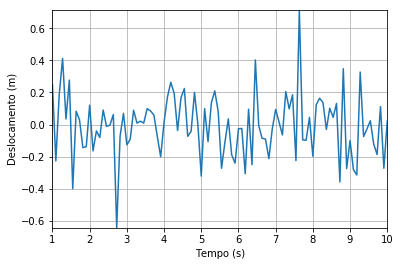

In [10]:
#alfa=vetor phi transposto (modo1) * matriz de massa * vetor velocidade transposto*-1
#beta=omega 1 * sen(-teta) * matriz de massa em i
alfa=[ ]
beta=[ ]
for i in range(0, o):
    alfa.append(np.dot(np.dot(modo1[i,:],M),np.transpose(vo)*-1))
    beta.append(np.sin(-teta)*fn[i]*2*np.pi*m)
    
#Umax para cada modo
umax = [ ]
tmin=min(td)
for i in range(0, o):
    umax.append(-alfa[i]/beta[i])

#Equação do deslocamento para cada modo
h=(o,100)
uk= np.zeros((10,100))
t=np.linspace(1,10,100);
for i in range(0, 10):
        uk[i,:]=umax[p]*np.cos(2*np.pi*fn[i]*t-teta); 
    

#U(t) = phi * uk, onde a soma dos termos de cada coluna resulta no deslocamento no instante representado na coluna    
U1 = np.dot(phi,uk)
U = [ ]
for i in range(0,np.size(t)):
    U.append(np.sum(uk[:,i]))

#Plotar resultados do deslocamento total para o impulso adotado
plt.plot(t, U)
plt.xlim(1, max(t));        plt.xlabel('Tempo (s)') 
plt.ylim(min(U), max(U));   plt.ylabel('Deslocamento (m)') 
plt.grid(True) 
